In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\chi_b\OneDrive\Desktop\Analytics QMST 5336\Project\median_home.csv",parse_dates=True)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,...,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020
0,102001,0,United States,Country,NaN,201418.0,200449.0,199120.0,196730.0,194797.0,...,257137,257825,258814,260043,260689,261917,262988,264418,263957,264196
1,394913,1,"New York, NY",Msa,NY,NaN,NaN,NaN,NaN,NaN,...,413816,416869,418076,420400,421735,425240,428224,431378,431688,433233
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,503804.0,494478.0,484313.0,471870.0,461970.0,...,652197,652506,654214,657927,664264,668946,671560,669932,669150,670493
3,394463,3,"Chicago, IL",Msa,IL,256009.0,252044.0,249908.0,248136.0,245965.0,...,236862,238005,237943,239387,239399,239198,239927,242900,244683,245164
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,153102.0,152734.0,151820.0,150924.0,150344.0,...,272017,273815,274783,275396,276412,277593,278603,279766,278915,279898


In [3]:
cityName = df['RegionName'].apply(lambda x: x.split(',')[0])
cityName.str.strip(" ")
cityName.tolist()

['United States',
 'New York',
 'Los Angeles-Long Beach-Anaheim',
 'Chicago',
 'Dallas-Fort Worth',
 'Philadelphia',
 'Houston',
 'Washington',
 'Miami-Fort Lauderdale',
 'Atlanta',
 'Boston',
 'San Francisco',
 'Detroit',
 'Riverside',
 'Phoenix',
 'Seattle',
 'Minneapolis-St Paul',
 'San Diego',
 'St. Louis',
 'Tampa',
 'Baltimore',
 'Denver',
 'Pittsburgh',
 'Portland',
 'Charlotte',
 'Sacramento',
 'San Antonio',
 'Orlando',
 'Cincinnati',
 'Cleveland',
 'Kansas City',
 'Las Vegas',
 'Columbus',
 'Indianapolis',
 'San Jose',
 'Austin',
 'Virginia Beach',
 'Nashville',
 'Providence',
 'Milwaukee',
 'Jacksonville',
 'Memphis',
 'Oklahoma City',
 'Louisville-Jefferson County',
 'Hartford',
 'Richmond',
 'New Orleans',
 'Buffalo',
 'Raleigh',
 'Birmingham',
 'Salt Lake City',
 'Rochester',
 'Grand Rapids',
 'Tucson',
 'Urban Honolulu',
 'Tulsa',
 'Fresno',
 'Worcester',
 'Stamford',
 'Albuquerque',
 'Albany',
 'Omaha',
 'New Haven',
 'Bakersfield',
 'Knoxville',
 'Greenville',
 'Ventur

In [4]:
df['City'] = cityName
dframe = df.drop(['RegionID','SizeRank','RegionName','RegionType','StateName'],axis=1)
dframe.head()

,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,...,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,City
0,201418.0,200449.0,199120.0,196730.0,194797.0,192549.0,190947.0,189004.0,186858.0,184020.0,...,257825,258814,260043,260689,261917,262988,264418,263957,264196,United States
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,416869,418076,420400,421735,425240,428224,431378,431688,433233,New York
2,503804.0,494478.0,484313.0,471870.0,461970.0,450887.0,442586.0,434549.0,430498.0,421410.0,...,652506,654214,657927,664264,668946,671560,669932,669150,670493,Los Angeles-Long Beach-Anaheim
3,256009.0,252044.0,249908.0,248136.0,245965.0,243767.0,239653.0,235855.0,231808.0,227299.0,...,238005,237943,239387,239399,239198,239927,242900,244683,245164,Chicago
4,153102.0,152734.0,151820.0,150924.0,150344.0,149985.0,149978.0,149598.0,149007.0,148296.0,...,273815,274783,275396,276412,277593,278603,279766,278915,279898,Dallas-Fort Worth


In [5]:
dframe =dframe.set_index('City')

In [6]:
exam_cities = ['United States','Austin','Portland','Seattle','Denver','Atlanta']
dframe = dframe.loc[exam_cities,:].rename_axis('Time', axis=1)
dframe.head()

Time,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,...,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020
City,,,,,,,,,,,,,,,,,,,,,
United States,201418.0,200449.0,199120.0,196730.0,194797.0,192549.0,190947.0,189004.0,186858.0,184020.0,...,257137,257825,258814,260043,260689,261917,262988,264418,263957,264196
Austin,193402.0,195785.0,194456.0,193157.0,192466.0,191796.0,191373.0,192545.0,191016.0,192095.0,...,319742,322128,324676,326519,326786,329577,331796,332657,329866,330122
Portland,276818.0,277288.0,276614.0,276020.0,272977.0,268181.0,265982.0,264036.0,260729.0,256404.0,...,400965,401750,404544,406873,408731,408423,410264,412363,413492,414900
Seattle,352040.0,349925.0,348199.0,344527.0,342206.0,337839.0,335655.0,332489.0,329457.0,325984.0,...,487939,491798,493861,498166,501834,504241,505534,506012,504220,508348
Denver,242986.0,240532.0,238391.0,237585.0,235607.0,233887.0,232128.0,231618.0,230179.0,226260.0,...,423935,424939,427013,427012,428811,430130,433373,433403,432708,432817


In [7]:
dframe = dframe.transpose()
dframe

City,United States,Austin,Portland,Seattle,Denver,Atlanta
Time,,,,,,
4/30/2008,201418.0,193402.0,276818.0,352040.0,242986.0,194117.0
5/31/2008,200449.0,195785.0,277288.0,349925.0,240532.0,192004.0
6/30/2008,199120.0,194456.0,276614.0,348199.0,238391.0,189697.0
7/31/2008,196730.0,193157.0,276020.0,344527.0,237585.0,186673.0
8/31/2008,194797.0,192466.0,272977.0,342206.0,235607.0,183963.0
...,...,...,...,...,...,...
2/29/2020,261917.0,329577.0,408423.0,504241.0,430130.0,260353.0
3/31/2020,262988.0,331796.0,410264.0,505534.0,433373.0,262282.0
4/30/2020,264418.0,332657.0,412363.0,506012.0,433403.0,265826.0


In [8]:
date_time_index = pd.to_datetime(dframe.index)
date_time_index

DatetimeIndex(['2008-04-30', '2008-05-31', '2008-06-30', '2008-07-31',
               '2008-08-31', '2008-09-30', '2008-10-31', '2008-11-30',
               '2008-12-31', '2009-01-31',
               ...
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30'],
              dtype='datetime64[ns]', name='Time', length=147, freq=None)

In [9]:
list_index = dframe.index.tolist()

In [10]:
#replace the current dframe index with the list of datetime
dframe = dframe.rename(index=dict(zip(list_index,date_time_index)))

In [11]:
dframe.head()

City,United States,Austin,Portland,Seattle,Denver,Atlanta
Time,,,,,,
2008-04-30,201418.0,193402.0,276818.0,352040.0,242986.0,194117.0
2008-05-31,200449.0,195785.0,277288.0,349925.0,240532.0,192004.0
2008-06-30,199120.0,194456.0,276614.0,348199.0,238391.0,189697.0
2008-07-31,196730.0,193157.0,276020.0,344527.0,237585.0,186673.0
2008-08-31,194797.0,192466.0,272977.0,342206.0,235607.0,183963.0


Text(0.5, 1.0, 'Median Condo Price 4/2008 - 6/2020')

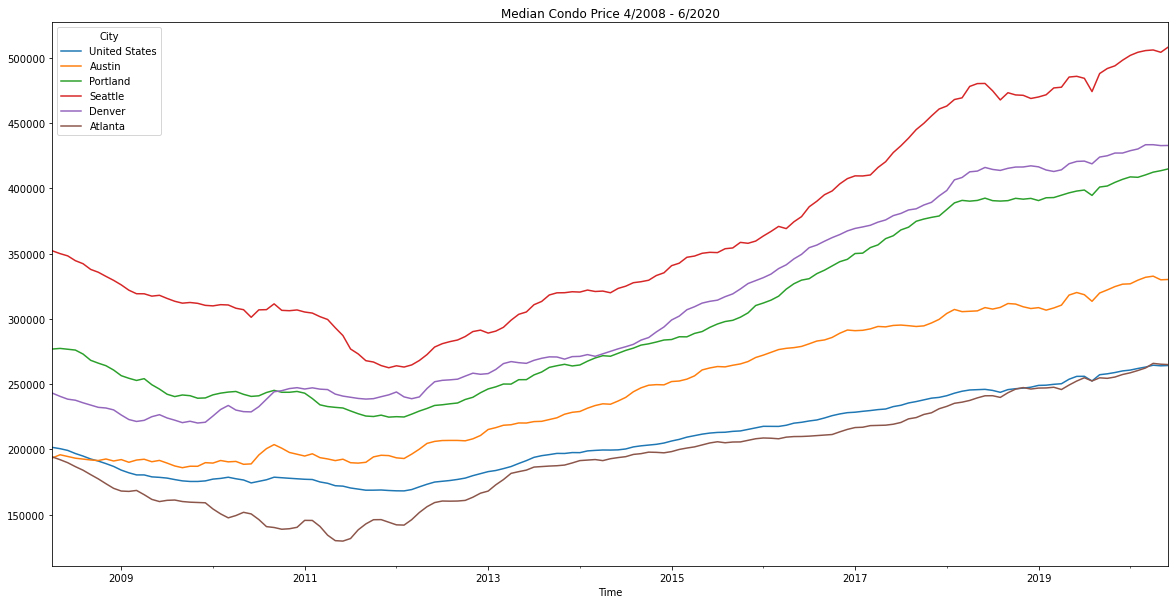

In [12]:
dframe.plot(subplots=False,figsize=(20,10))

plt.title('Median Condo Price 4/2008 - 6/2020')

### 2020

In [13]:
dframe_2020 = dframe.loc['12/31/2019':,:]
dframe_2020.head()

City,United States,Austin,Portland,Seattle,Denver,Atlanta
Time,,,,,,
2019-12-31,260043.0,326519.0,406873.0,498166.0,427012.0,257299.0
2020-01-31,260689.0,326786.0,408731.0,501834.0,428811.0,258596.0
2020-02-29,261917.0,329577.0,408423.0,504241.0,430130.0,260353.0
2020-03-31,262988.0,331796.0,410264.0,505534.0,433373.0,262282.0
2020-04-30,264418.0,332657.0,412363.0,506012.0,433403.0,265826.0


In [14]:
dframe_2020.describe()

City,United States,Austin,Portland,Seattle,Denver,Atlanta
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,262601.142857,329617.571429,410720.857143,504050.714286,431179.142857,262062.714286
std,1755.988936,2306.528044,2946.622441,3269.097567,2544.681082,3406.691441
min,260043.000000,326519.000000,406873.000000,498166.000000,427012.000000,257299.000000
25%,261303.000000,328181.500000,408577.000000,503027.000000,429470.500000,259474.500000
50%,262988.000000,329866.000000,410264.000000,504241.000000,432708.000000,262282.000000
75%,264076.500000,330959.000000,412927.500000,505773.000000,433095.000000,265041.500000
max,264418.000000,332657.000000,414900.000000,508348.000000,433403.000000,265826.000000


Text(0.5, 1.0, 'Median Condo Price 2020')

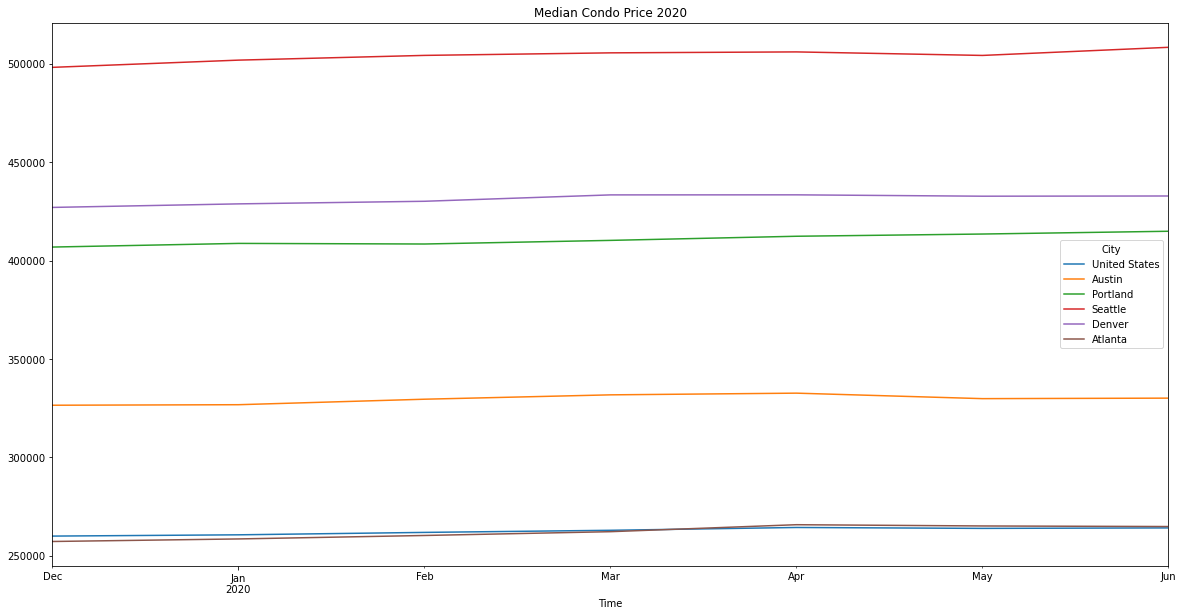

In [15]:
dframe_2020.plot(subplots=False,figsize=(20,10))

plt.title('Median Condo Price 2020')

In [16]:
list(dframe.index.values)

[numpy.datetime64('2008-04-30T00:00:00.000000000'),
 numpy.datetime64('2008-05-31T00:00:00.000000000'),
 numpy.datetime64('2008-06-30T00:00:00.000000000'),
 numpy.datetime64('2008-07-31T00:00:00.000000000'),
 numpy.datetime64('2008-08-31T00:00:00.000000000'),
 numpy.datetime64('2008-09-30T00:00:00.000000000'),
 numpy.datetime64('2008-10-31T00:00:00.000000000'),
 numpy.datetime64('2008-11-30T00:00:00.000000000'),
 numpy.datetime64('2008-12-31T00:00:00.000000000'),
 numpy.datetime64('2009-01-31T00:00:00.000000000'),
 numpy.datetime64('2009-02-28T00:00:00.000000000'),
 numpy.datetime64('2009-03-31T00:00:00.000000000'),
 numpy.datetime64('2009-04-30T00:00:00.000000000'),
 numpy.datetime64('2009-05-31T00:00:00.000000000'),
 numpy.datetime64('2009-06-30T00:00:00.000000000'),
 numpy.datetime64('2009-07-31T00:00:00.000000000'),
 numpy.datetime64('2009-08-31T00:00:00.000000000'),
 numpy.datetime64('2009-09-30T00:00:00.000000000'),
 numpy.datetime64('2009-10-31T00:00:00.000000000'),
 numpy.datet

### 2019

Text(0.5, 1.0, 'Median Condo Price 2019')

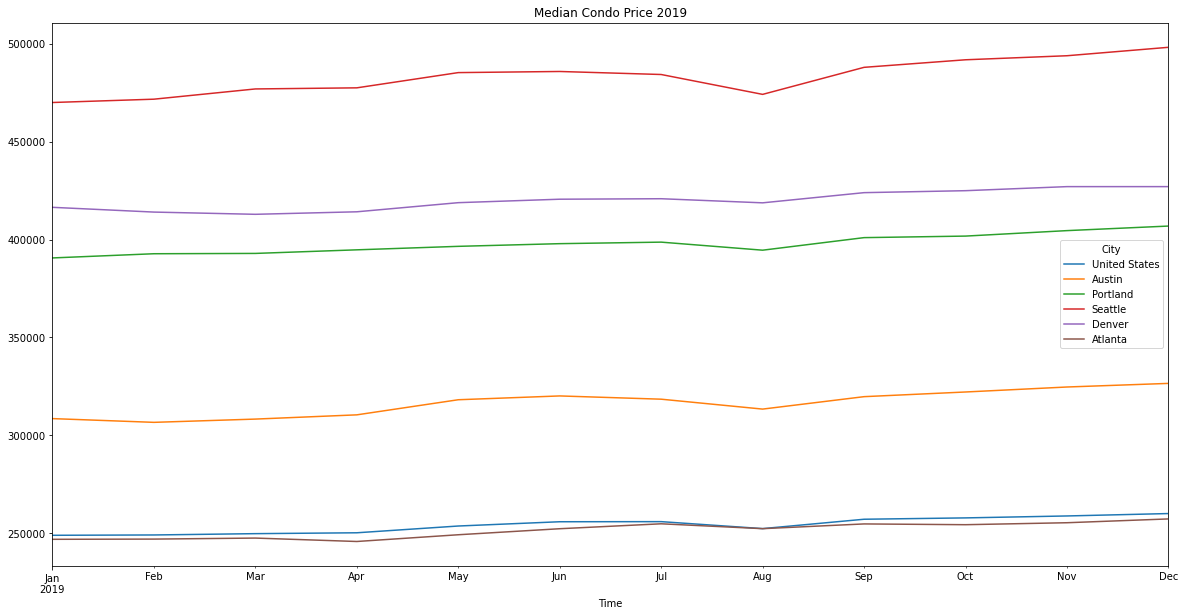

In [17]:
dframe_2019 =dframe.loc['1/31/2019':'12/31/2019',:]
dframe_2019.plot(subplots=False,figsize=(20,10))

plt.title('Median Condo Price 2019')

In [18]:
dframe_2019.describe()

City,United States,Austin,Portland,Seattle,Denver,Atlanta
count,12.000000,12.000000,12.0000,12.000000,12.000000,12.000000
mean,254139.333333,316424.500000,397725.5000,483104.583333,419946.750000,251464.416667
std,3994.072593,6766.394992,5020.7868,9089.183576,5005.611726,3986.068363
min,248941.000000,306623.000000,390593.0000,469975.000000,412875.000000,245774.000000
25%,250111.750000,309974.500000,394139.2500,476209.500000,415872.000000,247389.500000
50%,254768.500000,318310.500000,397198.0000,484762.500000,419702.000000,252310.500000
75%,257309.000000,320617.500000,401161.2500,488903.750000,424186.000000,254759.750000
max,260043.000000,326519.000000,406873.0000,498166.000000,427013.000000,257299.000000


# USING PANDAS DATETIME: pd.dt

In [19]:
dframe['Date'] = date_time_index
dframe.head()

City,United States,Austin,Portland,Seattle,Denver,Atlanta,Date
Time,,,,,,,
2008-04-30,201418.0,193402.0,276818.0,352040.0,242986.0,194117.0,2008-04-30
2008-05-31,200449.0,195785.0,277288.0,349925.0,240532.0,192004.0,2008-05-31
2008-06-30,199120.0,194456.0,276614.0,348199.0,238391.0,189697.0,2008-06-30
2008-07-31,196730.0,193157.0,276020.0,344527.0,237585.0,186673.0,2008-07-31
2008-08-31,194797.0,192466.0,272977.0,342206.0,235607.0,183963.0,2008-08-31


In [20]:
dframe['Month'] = dframe['Date'].dt.month
dframe['Year'] =dframe['Date'].dt.year
dframe.head()

City,United States,Austin,Portland,Seattle,Denver,Atlanta,Date,Month,Year
Time,,,,,,,,,
2008-04-30,201418.0,193402.0,276818.0,352040.0,242986.0,194117.0,2008-04-30,4,2008
2008-05-31,200449.0,195785.0,277288.0,349925.0,240532.0,192004.0,2008-05-31,5,2008
2008-06-30,199120.0,194456.0,276614.0,348199.0,238391.0,189697.0,2008-06-30,6,2008
2008-07-31,196730.0,193157.0,276020.0,344527.0,237585.0,186673.0,2008-07-31,7,2008
2008-08-31,194797.0,192466.0,272977.0,342206.0,235607.0,183963.0,2008-08-31,8,2008


## How months affect housing prices

Text(0.5, 1.0, 'Home Prices vs Months')

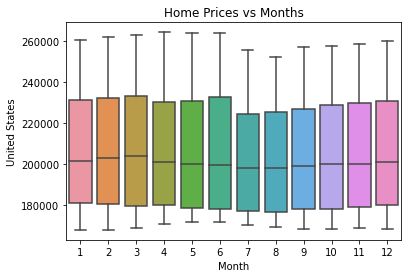

In [21]:
sns.boxplot(x='Month',y='United States',data=dframe)
plt.title('Home Prices vs Months')

(90000.0, 600000.0)

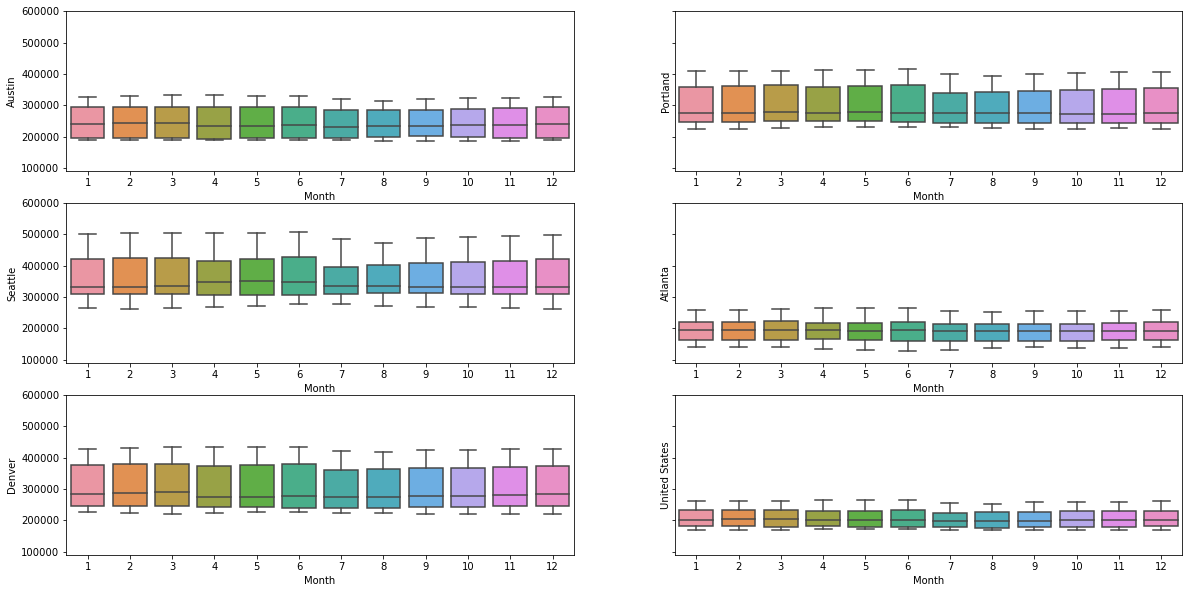

In [22]:
fig, axes = plt.subplots(3,2,figsize=(20,10),sharey=True)
    
sns.boxplot(x='Month',y='Austin',data=dframe, ax=axes[0,0])
sns.boxplot(x='Month',y='Portland',data=dframe, ax=axes[0,1])
sns.boxplot(x='Month',y='Seattle',data=dframe, ax=axes[1,0])
sns.boxplot(x='Month',y='Atlanta',data=dframe, ax=axes[1,1])
sns.boxplot(x='Month',y='Denver',data=dframe, ax=axes[2,0])
sns.boxplot(x='Month',y='United States',data=dframe, ax=axes[2,1])


plt.ylim(90000,600000)

###### Notes:
within the U.S, summer tends to have lower prices  
Austin: low during July, August  
Portland: low during July,August  
Seattle: low during Winter  
Atlanta: low during August  
Denver: low during April  

But none are significant


## Portland In Depth

### Overall Trend 2008-2020

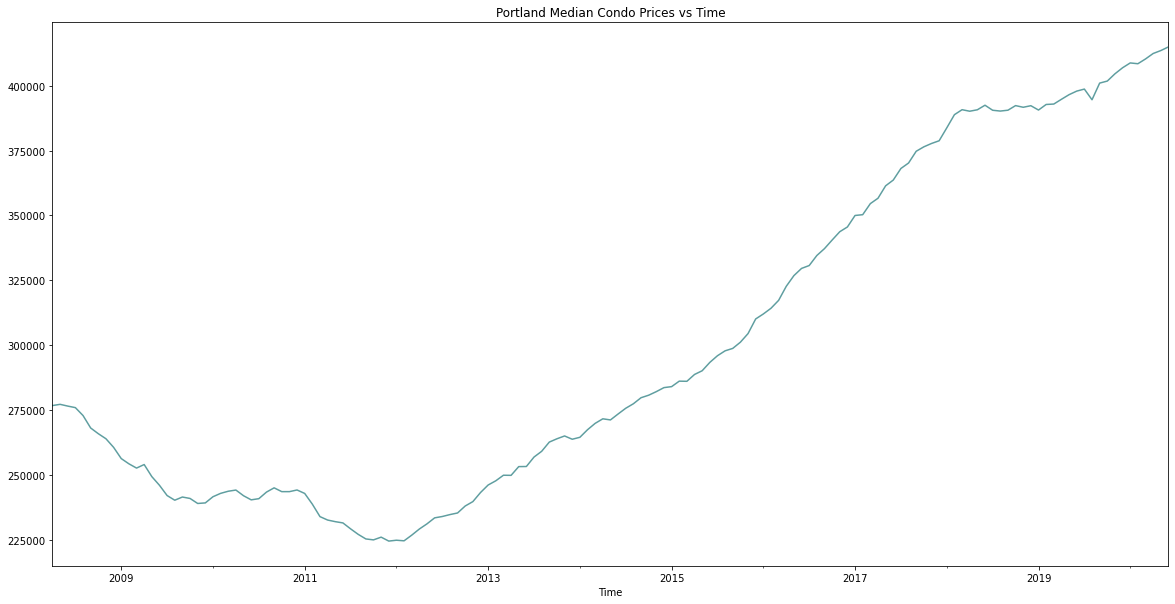

In [23]:
dframe['Portland'].plot(color='cadetblue',title='Portland Median Condo Prices vs Time',figsize=(20,10))

plt.show()

There is a clear affect from the 2009 recession after which the housing prices crashed then recovered around 2012

## Portland each year:

### Month vs Price?
Does month affect price?

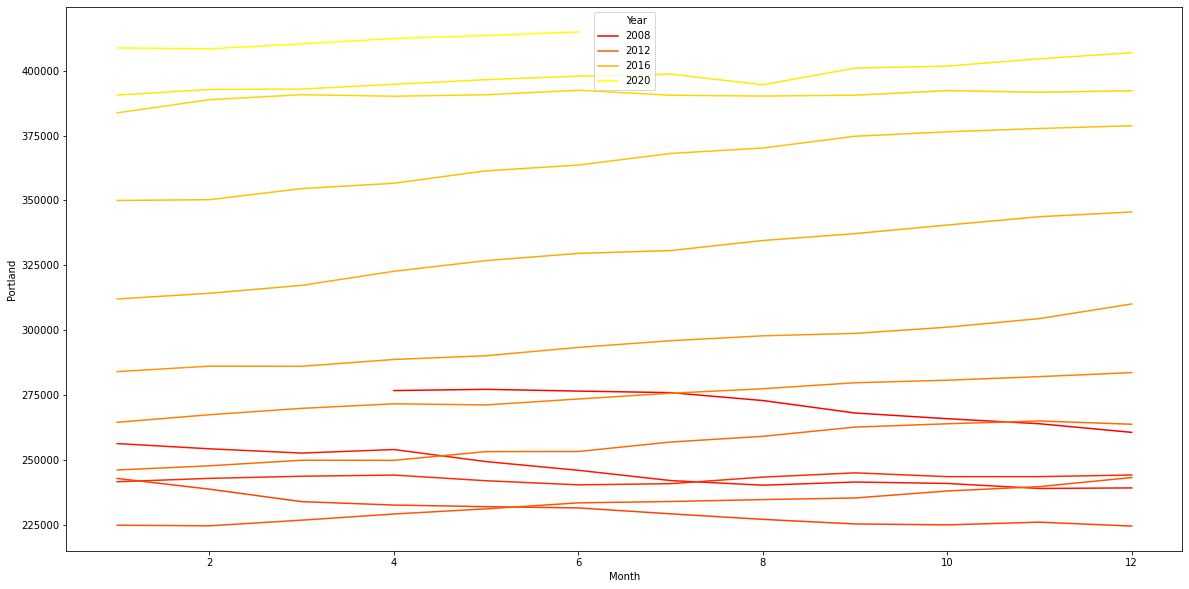

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(x=dframe.Month,y=dframe.Portland,hue=dframe.Year,palette='autumn')

Overall the earlier months are cheaper since home prices increase slowly. For the earlier years (2008-2012), home prices were lowering down during winter but that might have been the result of the recession.

Months don't seem to affect prices, prices just seem to increase as time goes on

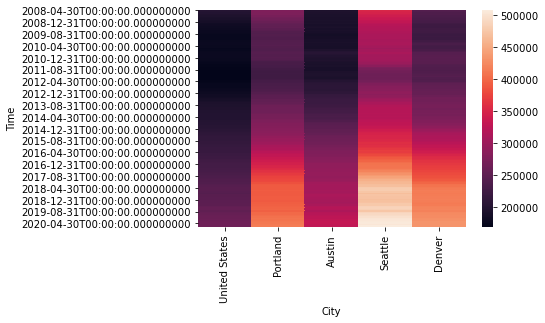

In [25]:
sns.heatmap(dframe.loc[:,['United States','Portland','Austin','Seattle','Denver']])

#### QUICK SEABORN TIP: SNS not support datetime
So we have to create datetime ordinal

(array([733000., 733500., 734000., 734500., 735000., 735500., 736000.,
        736500., 737000., 737500., 738000.]),
 <a list of 11 Text major ticklabel objects>)

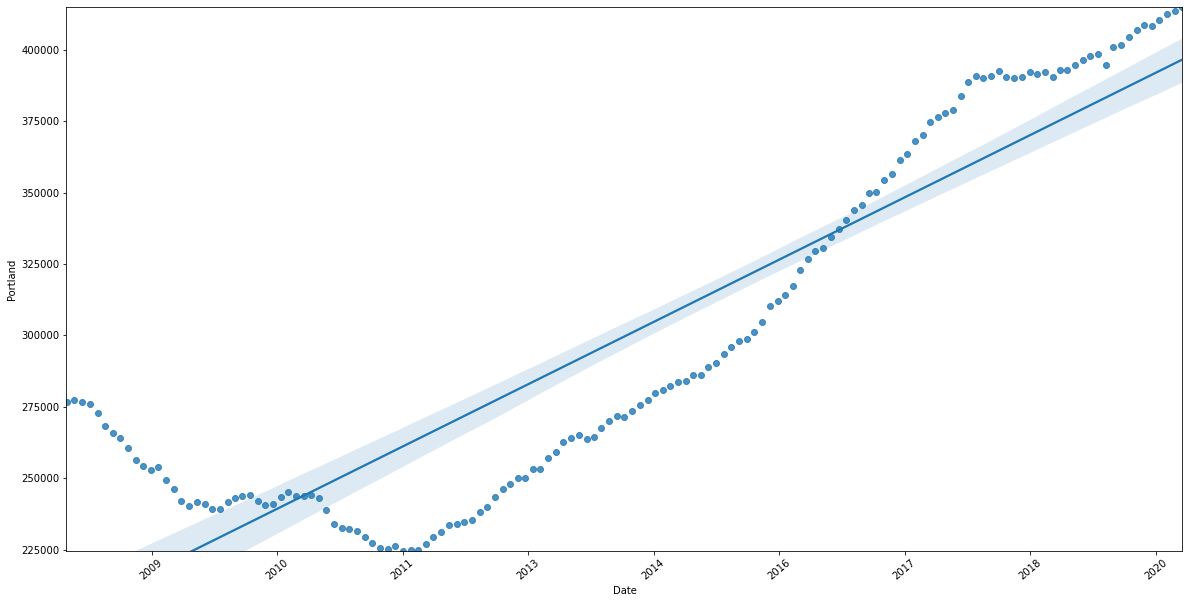

In [52]:
from datetime import date


plt.figure(figsize=(20,10))
#create an ordinal column
dframe['date_ordinal'] = pd.to_datetime(dframe.Date).apply(lambda date: date.toordinal())

#make a plot with ordinals on the date axis
ax = sns.regplot(
    data=dframe,
    x='date_ordinal',
    y='Portland',
)

# Tighten up the axes for prettiness
ax.set_xlim(dframe['date_ordinal'].min() - 1, dframe['date_ordinal'].max() + 1)
ax.set_ylim(dframe['Portland'].min()-1, dframe['Portland'].max() + 1)

#Replace the ordinal X-axis labels with nice, readable dates

ax.set_xlabel('Date')
new_labels = [date.fromordinal(int(item)).year for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.xticks(rotation=40)


##### 2020

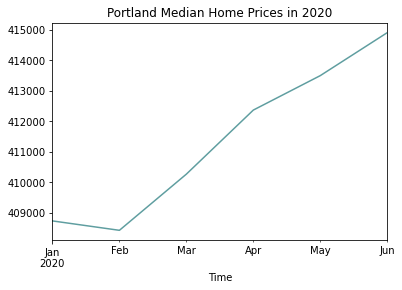

In [26]:
#choose the dframe with portland, within that dataframe choose the ones with year == 2020
portland_2020 = dframe.loc[:,'Portland'][dframe['Year']==2020]
portland_2020.plot(color='cadetblue',title='Portland Median Home Prices in 2020')

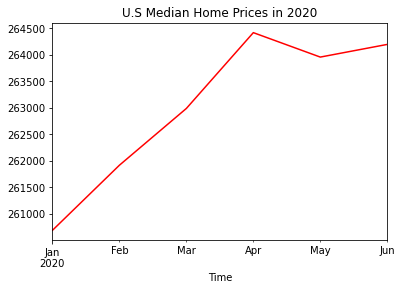

In [27]:
US_2020 = dframe.loc[:,'United States'][dframe['Year']==2020]
US_2020.plot(color='r',title='U.S Median Home Prices in 2020')

#### Cities comparison 2020

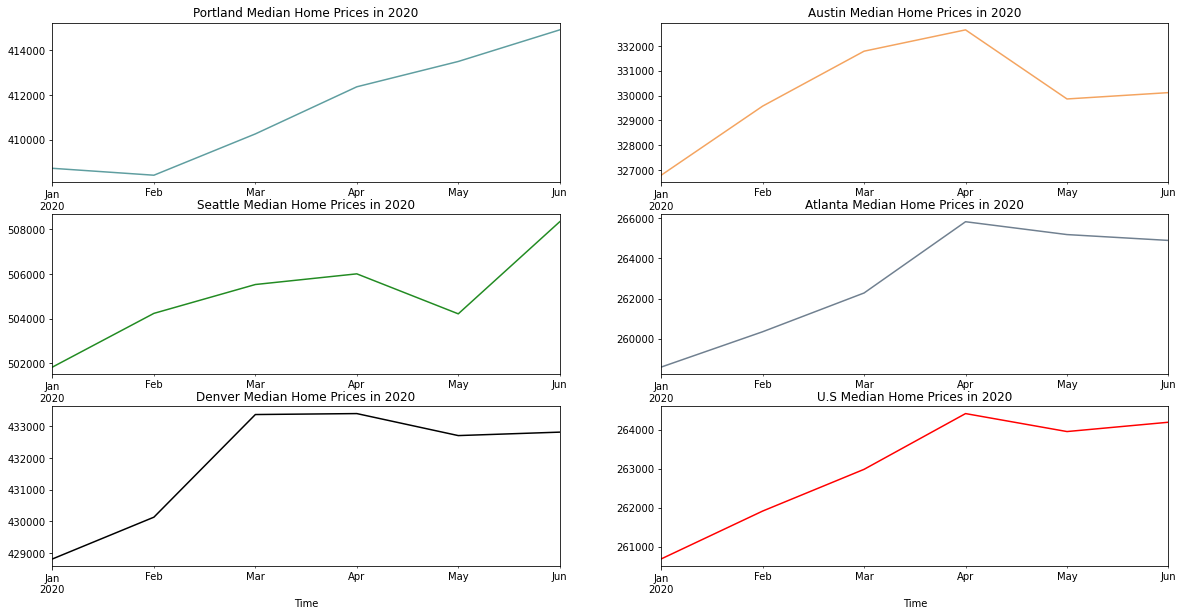

In [28]:
austin_2020 = dframe.loc[:,'Austin'][dframe['Year']==2020]
seattle_2020 = dframe.loc[:,'Seattle'][dframe['Year']==2020]
atlanta_2020 = dframe.loc[:,'Atlanta'][dframe['Year']==2020]
denver_2020 = dframe.loc[:,'Denver'][dframe['Year']==2020]
US_2020 = dframe.loc[:,'United States'][dframe['Year']==2020]

fig,axes = plt.subplots(3,2,figsize=(20,10))
portland_2020.plot(color='cadetblue',title='Portland Median Home Prices in 2020',ax=axes[0,0])
austin_2020.plot(color='sandybrown',title='Austin Median Home Prices in 2020',ax=axes[0,1])
seattle_2020.plot(color='forestgreen',title='Seattle Median Home Prices in 2020',ax=axes[1,0])
atlanta_2020.plot(color='slategray',title='Atlanta Median Home Prices in 2020',ax=axes[1,1])
denver_2020.plot(color='black',title='Denver Median Home Prices in 2020',ax=axes[2,0])
US_2020.plot(color='red',title='U.S Median Home Prices in 2020',ax=axes[2,1])



Austin seems to have been hit heavily in May and is slowly recovering while other cities and U.S have recovered from the pandemic

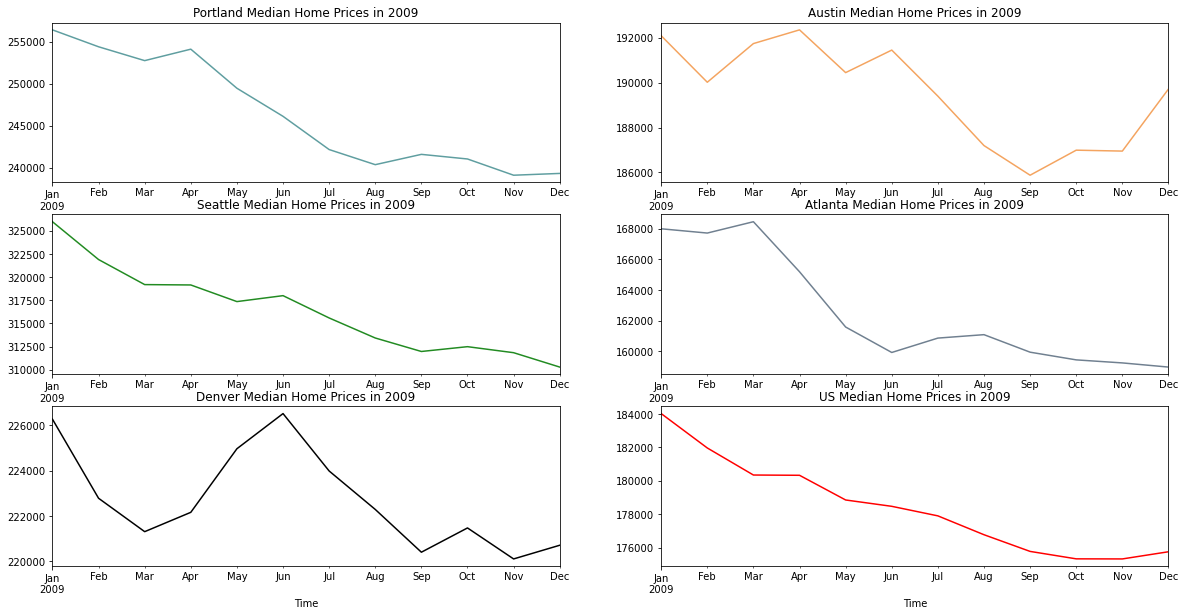

In [29]:
##### How about 2009?

portland_2009 = dframe.loc[:,'Portland'][dframe['Year']==2009]
austin_2009 = dframe.loc[:,'Austin'][dframe['Year']==2009]
seattle_2009 = dframe.loc[:,'Seattle'][dframe['Year']==2009]
atlanta_2009 = dframe.loc[:,'Atlanta'][dframe['Year']==2009]
denver_2009 = dframe.loc[:,'Denver'][dframe['Year']==2009]
US_2009 = dframe.loc[:,'United States'][dframe['Year']==2009]

fig,axes = plt.subplots(3,2,figsize=(20,10))
portland_2009.plot(color='cadetblue',title='Portland Median Home Prices in 2009',ax=axes[0,0])
austin_2009.plot(color='sandybrown',title='Austin Median Home Prices in 2009',ax=axes[0,1])
seattle_2009.plot(color='forestgreen',title='Seattle Median Home Prices in 2009',ax=axes[1,0])
atlanta_2009.plot(color='slategray',title='Atlanta Median Home Prices in 2009',ax=axes[1,1])
denver_2009.plot(color='black',title='Denver Median Home Prices in 2009',ax=axes[2,0])
US_2009.plot(color='red',title='US Median Home Prices in 2009',ax=axes[2,1])


Unlike 2020, only Austin was showing signs of recovery from 2009